# Linear Regression using Least Squares method
## Introduction
Linear Regression is a statistical method for finding the relationship between a dependent variable with a given set of independent variables. The relationship is modelled using a linear equation. The coefficients of the linear equation are estimated using the training data. Once the model is trained, it can be used to predict the value of the dependent variable for a given set of independent variables.
The least squares method is a statistical procedure for determining the best fit for a set of data points by minimizing the sum of offsets or residuals from the plotted curve. To predict the behavior of dependent variables, least squares regression is used. The least squares method is used to find the best fit line for a set of data points. The best fit line is the line that minimizes the sum of the squares of the vertical distances between the data points and the line.

Linear Regression Formula:
$$y = mx + c$$
where,
* y is the dependent variable
* x is the independent variable
* m is the slope of the line

For multiple independent variables, the equation becomes:
$$y = m_1x_1 + m_2x_2 + m_3x_3 + ... + m_nx_n + c$$
where,
* y is the dependent variable
* x1, x2, x3, ..., xn are the independent variables
* m1, m2, m3, ..., mn are the coefficients of the independent variables
* c is the constant

This answer in the Stack Overflow forum explains the derivation of the formula for linear regression using least squares method. <https://stackoverflow.com/questions/32114215/how-to-calculate-the-intercept-using-numpy-linalg-lstsq>

Using Least Square Method, we can solve for m and c.

 The formula for m is:
$$m = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$
where,
* $\bar{x}$ is the mean of x
* $\bar{y}$ is the mean of y

The formula for c is:
$$c = \bar{y} - m\bar{x}$$

In this notebook, we will use the Least Squares method to estimate the coefficients of the linear equation. We will use the Fish Species dataset to train the model and predict the value of the dependent variable i.e. weight of a fish for a given set of independent variables.

We can use the following performance metrics to evaluate the performance of a Linear Regression model:
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* R-Squared Score (R2 Score)

## Importing Libraries and Dataset

In [62]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
import sys
sys.path.append('../../')

# importing utilities
from utilities.LabelEncoder import LabelEncoder
from utilities.TrainTestSplit import train_test_split
from utilities.MeanSquaredError import mean_squared_error
from utilities.MeanAbsoluteError import mean_absolute_error
from utilities.R2Score import r2_score

In [32]:
# importing dataset
dataset_org = pd.read_csv('./../../datasets/fish_market/Fish.csv')
dataset_org.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [33]:
dataset = dataset_org.copy()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
# checking the unique values in the species columns
dataset['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

We will Label encode the Species column as it is a categorical column with 7 unique values. Since the unique values are unbalanced, we might see some accuracy issues later on.

In [6]:
le = LabelEncoder()
encoded_species =  le.fit_transform(dataset['Species'])
encoded_species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [7]:
# creating a new column in the dataset for the encoded species i.e. containing numerical values
dataset['Species'] = encoded_species

Now we have encoded the Species column using LabelEncoder.

In [8]:
# getting the top 5 rows of the dataset
dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [9]:
# separating the features (X as it is a matrix) and the target (y as it is a vector)
# we normally represent a matrix as X (capital X) and a vector as y (small y)c
X = dataset.drop('Weight', axis=1)
y = dataset['Weight']

In [10]:
# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Actual Linear Regression Model

In [11]:
# Simple Linear Regression Model using Least Squares Method
class LinearRegression:
    def __init__(self, fit_intercept=True, copy_X=True, n_jobs=None):
        self.coef_ = None  # coefficients i.e. m1, m2, m3, ... mn
        self.intercept_ = None  # intercept i.e. c
        self.n_features_in_ = None  # number of features
        self.feature_names_in_ = None  # names of features if available
        self.res_ = None  # sum of squared errors i.e. residuals

    # get the feature names if available (accepts DataFrame, Series, List, Numpy Array) else returns None
    def _get_feature_names(self, X):
        if type(X) == pd.DataFrame:
            return X.columns
        elif type(X) == pd.Series:
            return X.name
        elif type(X) == np.ndarray:
            return np.arange(X.shape[1])
        elif type(X) == list:
            return np.arange(len(X))
        else:
            return None

    def fit(self, X, y):
        # getting the number of features and the feature names
        self.n_features_in_ = X.shape[1]
        self.feature_names_in_ = self._get_feature_names(X)

        # we use np.linalg.lstsq to find the coefficients and the y-intercept
        X = np.array(X)  # converting to numpy array
        X = np.append(
            X, np.ones(len(X), dtype=int).reshape(-1, 1), axis=1
        )  # adding an extra row of ones

        # finding the coefficients and the y-intercept
        coef = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.coef_ = coef[:-1]
        self.intercept_ = coef[-1]
        self.res_ = np.sum((y - X.dot(coef)) ** 2)

        return self

    # predicting the values Y = m1X1 + m2X2 + m3X3 + ... + mnXn + c
    def predict(self, X):
        X = np.array(X)
        X = np.append(
            X, np.ones(len(X), dtype=int).reshape(-1, 1), axis=1
        )  # adding an extra row of ones to get the y-intercept

        return X.dot(np.append(self.coef_, self.intercept_))

    # R2 score # coefficient of determination # r2 = 1 - (residuals / total sum of squares)
    def score(self, X, y):
        # predicting the values first
        y_pred = self.predict(X)

        # calculating the residuals and total sum of squares
        SSres = np.sum((y - y_pred) ** 2)
        SStot = np.sum((y - np.mean(y)) ** 2)

        # applying the formula
        r2_score = 1 - SSres / SStot

        return r2_score
    
    # get parameters
    def get_params(self):
        return {
            'coef_': self.coef_,
            'intercept_': self.intercept_,
            'n_features_in_': self.n_features_in_,
            'feature_names_in_': self.feature_names_in_,
            'res_': self.res_
        }
    
    # set parameters
    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)

        return self

## Model Implementation
Now, we apply Linear Regression on the dataset.

In [17]:
# creating an object of the LinearRegression class
lin_reg = LinearRegression()

# fitting the model
lin_reg.fit(X_train, y_train)

# getting the parameters of the model
lin_reg.get_params() # only works if the model has been fitted else everything will be None

{'coef_': array([ 43.60261349,  45.1399315 , -19.05174841,  -4.66721214,
         33.0267209 ,  46.85489377]),
 'intercept_': -687.014485000826,
 'n_features_in_': 6,
 'feature_names_in_': Index(['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object'),
 'res_': 2001227.9360694597}

## Model Evaluation

In [24]:
# predicting the values for the test set
y_pred = lin_reg.predict(X_test)

# comparing the top 10 actual and predicted values
for i in range(10):
    print(f'Actual: {y_test.iloc[i]} \t Predicted: {y_pred[i].round(2)}')

Actual: 7.0 	 Predicted: -158.28
Actual: 430.0 	 Predicted: 588.47
Actual: 250.0 	 Predicted: 342.42
Actual: 1000.0 	 Predicted: 968.04
Actual: 180.0 	 Predicted: 359.44
Actual: 685.0 	 Predicted: 738.51
Actual: 12.2 	 Predicted: -100.85
Actual: 500.0 	 Predicted: 717.58
Actual: 130.0 	 Predicted: 135.6
Actual: 6.7 	 Predicted: -179.8


## Analysis on the result
As we can see some predicted values are in negatives. THe negetive predictions are due to the actual weights bein around 5-20 (guessing roughly). This is mainly because the dataset contains several fishes (i.e. several species of fish), and the y (weight in our dataset) is skewed towards positive. This condition is also called positively skewed. It occurs when the mean is greater than the median of a variable. Plainly speaking, there are more values above the median value. We can check our hypothesis by looking at the mean and median of the dataset.

In [27]:
print('weight_mean:\t', np.mean(y))
print('weight_median:\t', np.median(y))

weight_mean:	 398.3264150943396
weight_median:	 273.0


Our hypothesis was true, and the dataset is positively skewed. We can look at the distribution of the dataset to further solidify our hypothesis.

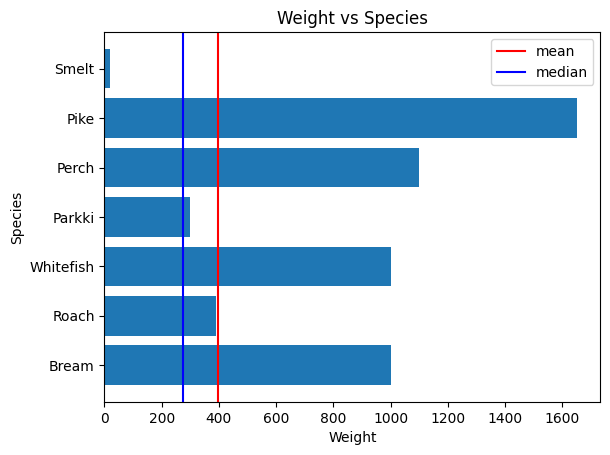

In [40]:
# plotting a bar graph to compare the distribution of weight among the species
plt.barh(dataset_org['Species'], dataset_org['Weight'])
plt.axvline(np.mean(y), color='red', label='mean')
plt.axvline(np.median(y), color='blue', label='median')
plt.legend()
plt.title('Weight vs Species')
plt.xlabel('Weight')
plt.ylabel('Species')
plt.show()

From the above graph, we can see that 4 out of 7 species of fish have the weight more than double the median and more than triple the mean. This is the reason why we are getting negative predictions. One simple solution to fix this would be to remove any outlier species, but that would remove a whole chunk of the dataset of that species, and this solution is quite controversal too. One logical and most preferred solution would be using a log transformation on the y variable. But that is not the scope of this notebook. We will leave it for another time. Let's jump back to the current notebook.

## Further Model Evaluation
We will use the following metrics to evaluate the performance of the model:
1. Mean Absolute Error (MAE)
2. Root Mean Squared Error (RMSE)
3. R2 Score

In [60]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:\t\t', mae)
print('Root Mean Squared Error:\t', rmse)
print('R2 Score:\t\t\t', r2)

Mean Absolute Error:		 0.13114850000000003
Root Mean Squared Error:	 0.18552281614399888
R2 Score:			 0.9915349176550484


We can see that scores are not that great, but not that terrible either. We can try to improve the model by using a different algorithm. We will try to use a different algorithm in the next notebook. One way to improve the model would be to use an optimization technique like Gradient Descent. We will try to use that in the next notebook.

## Apply Model on another dataset

In [47]:
# testing the set parameters function on a different dataset and with a different model
df = pd.read_csv('./../../datasets/student_grade/Student_Grade.csv')
X = df['Study Time In Minutes']
y = df['Credit Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
lin_reg = LinearRegression() # creating an object of the LinearRegression class
lin_reg.get_params() # getting the parameters of the model before fitting it

{'coef_': None,
 'intercept_': None,
 'n_features_in_': None,
 'feature_names_in_': None,
 'res_': None}

In [50]:
# now we will set the parameters of the model taken from a previously fitted model
lin_reg.set_params(coef_=[0.01986], intercept_=1.8)
lin_reg.get_params() # getting the parameters of the model after setting them

{'coef_': [0.01986],
 'intercept_': 1.8,
 'n_features_in_': None,
 'feature_names_in_': None,
 'res_': None}

## Model Evaluation II

In [54]:
y_pred = lin_reg.predict(np.array(X_test).reshape(-1, 1)) # predicting the values for the test set

# comparing the top 10 actual and predicted values
for i in range(10):
    print(f'Actual: {y_test.iloc[i]} \t Predicted: {y_pred[i].round(2)}')

Actual: 8.2 	 Predicted: 7.96
Actual: 5.5 	 Predicted: 5.57
Actual: 8.96 	 Predicted: 8.73
Actual: 8.18 	 Predicted: 8.0
Actual: 9.15 	 Predicted: 8.89
Actual: 4.2 	 Predicted: 4.3
Actual: 4.72 	 Predicted: 4.7
Actual: 4.4 	 Predicted: 4.46
Actual: 5.08 	 Predicted: 5.12
Actual: 7.98 	 Predicted: 7.84


Looking at the results, we can see that the model predicted pretty good grades. Even the parameters to the model were hard coded by us, those params were taken out from a fittted model for this dataset.
We can check the performance of the model by using the previously used functions.

In [61]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:\t\t', mae)
print('Root Mean Squared Error:\t', rmse)
print('R2 Score:\t\t\t', r2)

Mean Absolute Error:		 0.13114850000000003
Root Mean Squared Error:	 0.18552281614399888
R2 Score:			 0.9915349176550484


99.9% accuracy is a great score. Plus, the MAE and RMSE are also very low. This means that the model is performing very well.

## Conclusion
In this, notebook, we have created a Linear Regression Model using Least Square method from scratch. Linear Regression are widely used for linear datasets, and as we can see, they are very easy to implement. We can also use the same method to implement Logistic Regression, which we will cover it in upcoming notebooks.